In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
tweet_data= pd.read_csv('processed_tweet_data.csv')
tweet_data.head(8)

,statuses_count,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,screen_name,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location,language
0,40,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,2356,355,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN,de
1,40,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,1985,505,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN,de
2,40,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,16,4,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN,de
3,40,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,1242,332,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN,de
4,40,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,1329,386,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN,de
5,40,Fri Apr 22 22:12:51 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @biggyyyyyyy: https://t.co/jvvA7F9m4U,0.0,0.0,252,77,McMc74078966,3,12,False,[],"[{'screen_name': 'biggyyyyyyy', 'name': 'Biggy...",NaN,und
6,40,Fri Apr 22 22:12:17 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","RT @SiriaBlack_II: Ich bin mir sicher, dass vi...",0.0,0.0,1018,129,McMc74078966,3,12,NaN,"[{'text': 'Baerbock', 'indices': [130, 139]}]","[{'screen_name': 'SiriaBlack_II', 'name': 'Dan...",NaN,de
7,40,Fri Apr 22 22:10:01 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Darling_2022: Ich wiederhole mich gerne no...,0.0,0.0,3824,860,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Darling_2022', 'name': 'Darl...",NaN,de


In [3]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      24625 non-null  int64  
 1   created_at          24625 non-null  object 
 2   source              24625 non-null  object 
 3   original_text       24625 non-null  object 
 4   polarity            24625 non-null  float64
 5   subjectivity        24625 non-null  float64
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   screen_name         24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  location            15731 non-null  object 
 15  language            24625 non-null  object 
dtypes: f

In [4]:
tweet_data.isnull().sum()

statuses_count            0
created_at                0
source                    0
original_text             0
polarity                  0
subjectivity              0
favorite_count            0
retweet_count             0
screen_name               0
followers_count           0
friends_count             0
possibly_sensitive    14650
hashtags                  0
user_mentions             0
location               8894
language                  0
dtype: int64

In [5]:
tweet_data.nunique(axis=0)

statuses_count          492
created_at            23100
source                   66
original_text         22479
polarity                988
subjectivity            804
favorite_count         3292
retweet_count          2119
screen_name             500
followers_count         458
friends_count           419
possibly_sensitive        2
hashtags               6574
user_mentions         11246
location                234
language                 49
dtype: int64

In [6]:
tweet_data.describe()

,statuses_count,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,2.462500e+04,24625.000000,24625.000000,2.462500e+04,24625.000000,2.462500e+04,24625.000000
mean,5.030458e+04,0.059958,0.218877,2.595941e+03,538.587168,1.025754e+05,1299.831878
std,1.427207e+05,0.238632,0.302802,2.903256e+04,6045.417765,1.013419e+06,2939.129745
min,1.000000e+00,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.696000e+03,0.000000,0.000000,0.000000e+00,0.000000,1.130000e+02,111.000000
50%,9.354000e+03,0.000000,0.000000,1.000000e+00,1.000000,4.910000e+02,413.000000
75%,4.148800e+04,0.055556,0.447115,1.150000e+02,37.000000,1.935000e+03,1336.000000
max,2.307455e+06,1.000000,1.000000,1.339072e+06,434379.000000,1.695995e+07,41866.000000


<AxesSubplot:>

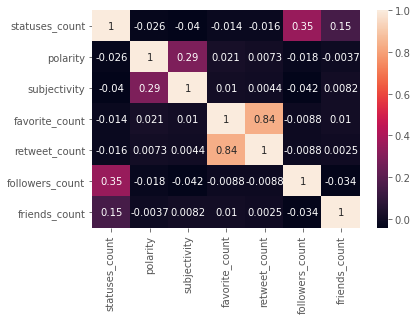

In [7]:
sns.heatmap(tweet_data.corr(), annot=True)


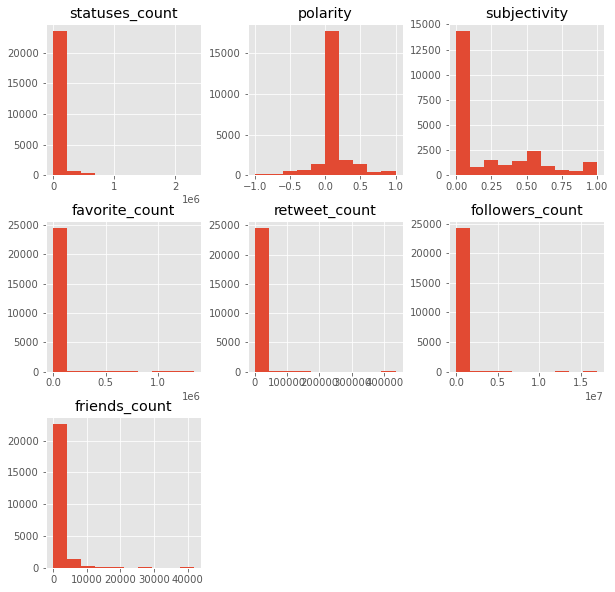

In [8]:
tweet_data.select_dtypes(include=np.number).hist(figsize=(10,10))
plt.show()

In [9]:
Laety=tweet_data.select_dtypes(include=np.number)
Laety

,statuses_count,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
0,40,0.0,0.0,2356,355,3,12
1,40,0.0,0.0,1985,505,3,12
2,40,0.0,0.0,16,4,3,12
3,40,0.0,0.0,1242,332,3,12
4,40,0.0,0.0,1329,386,3,12
...,...,...,...,...,...,...,...
24620,21272,0.0,0.0,2342,242,706,643
24621,21272,0.0,0.0,2298,242,706,643
24622,21272,0.0,0.0,1025,203,706,643
24623,21272,0.0,0.0,3735,301,706,643


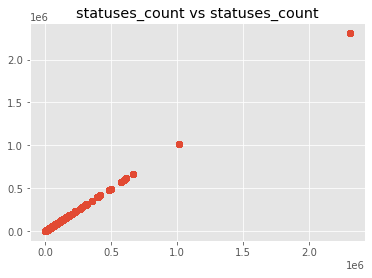

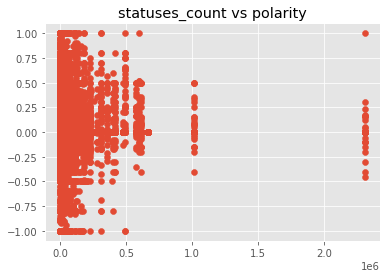

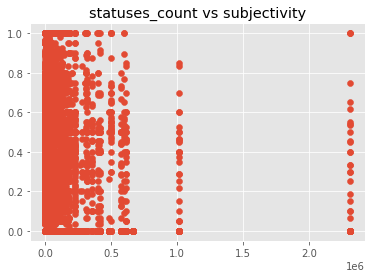

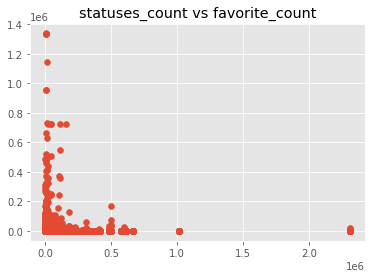

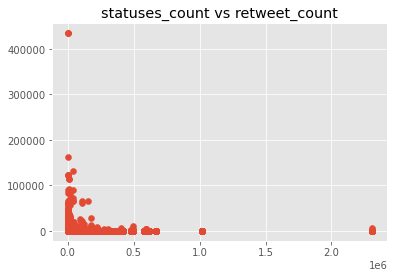

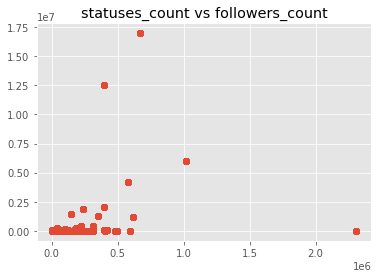

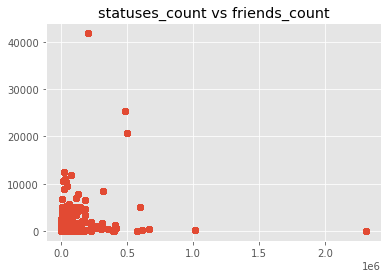

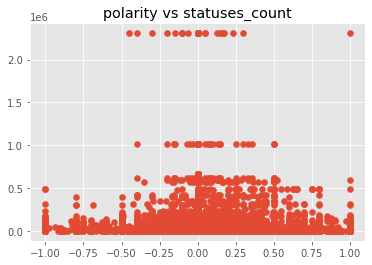

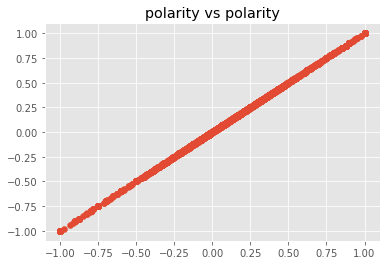

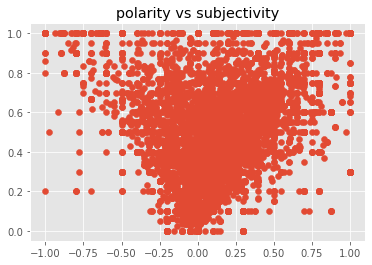

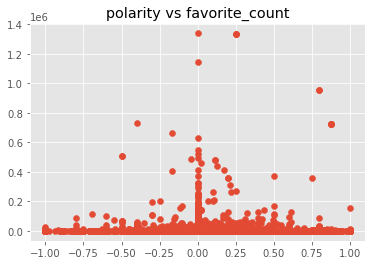

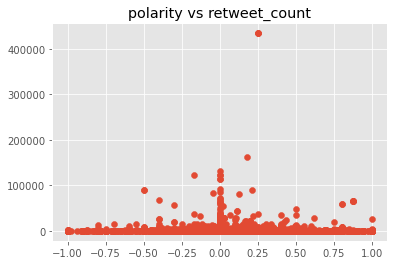

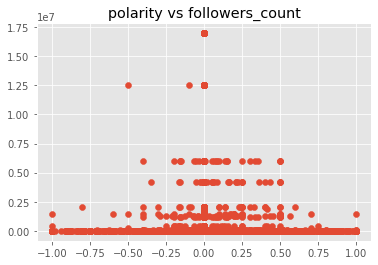

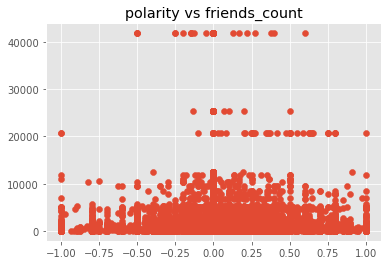

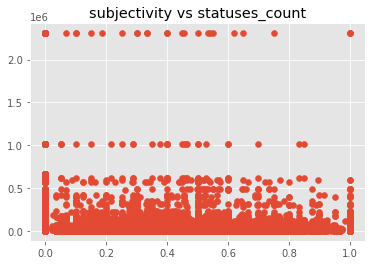

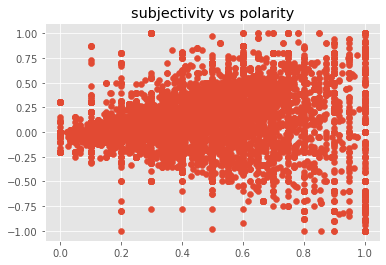

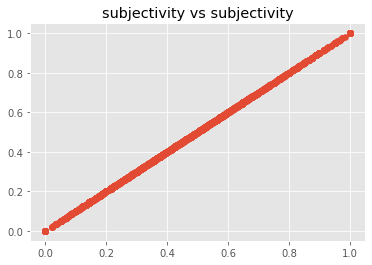

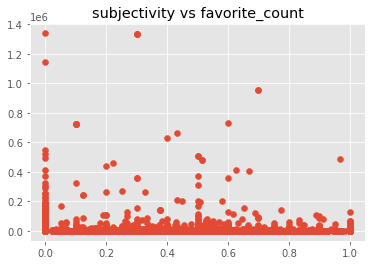

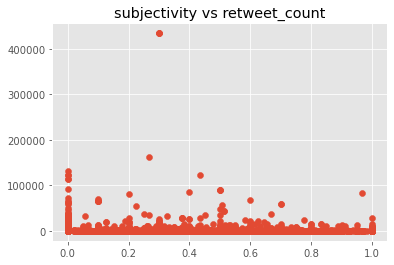

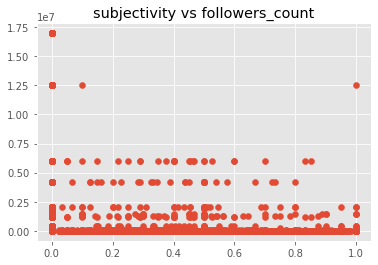

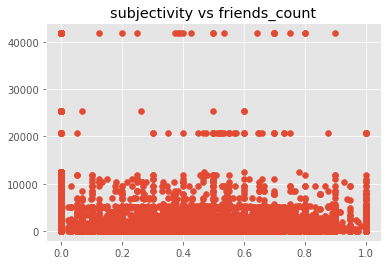

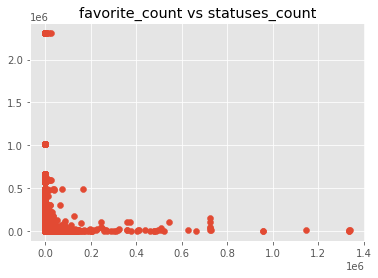

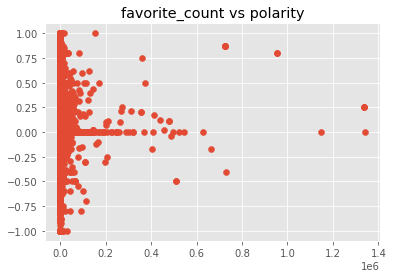

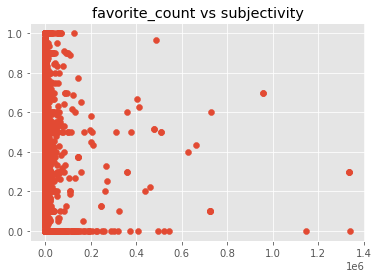

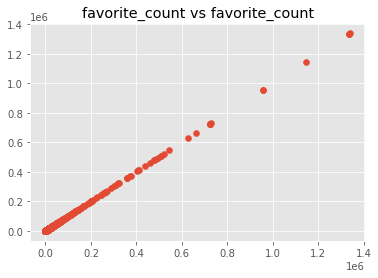

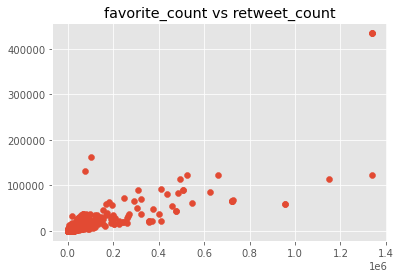

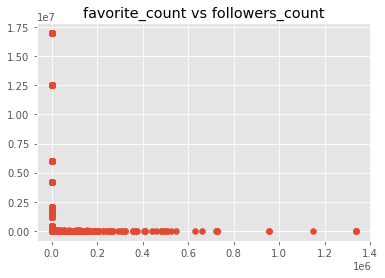

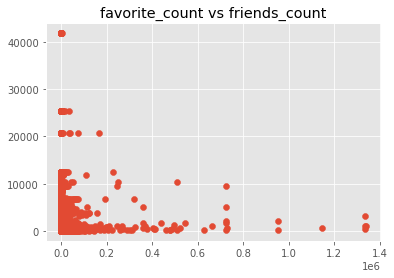

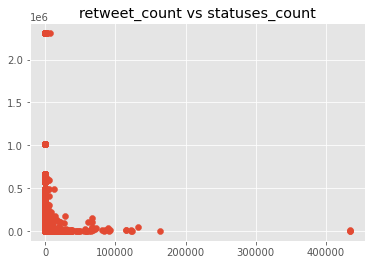

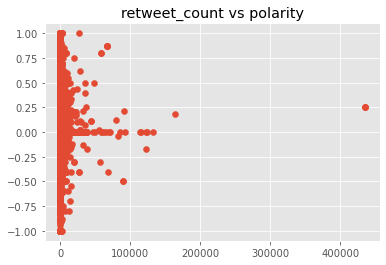

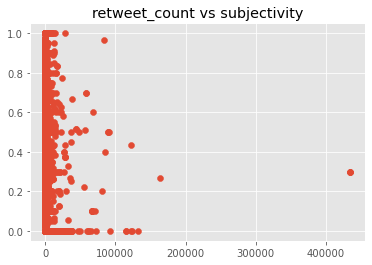

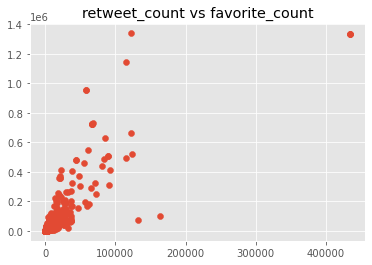

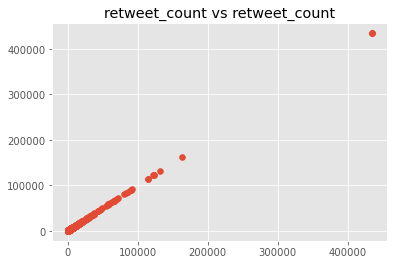

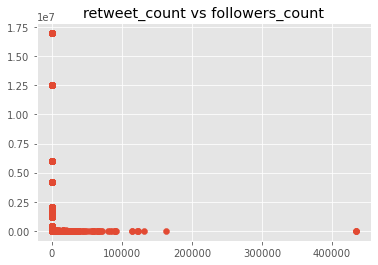

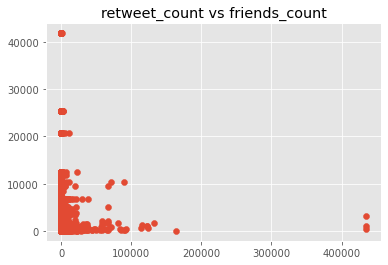

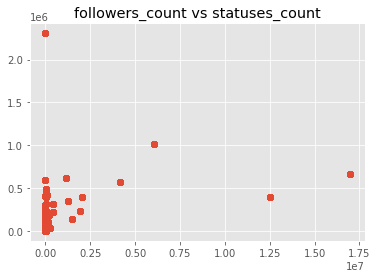

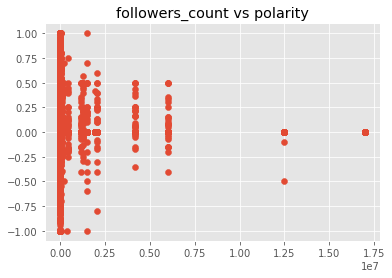

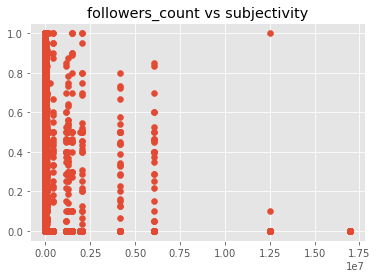

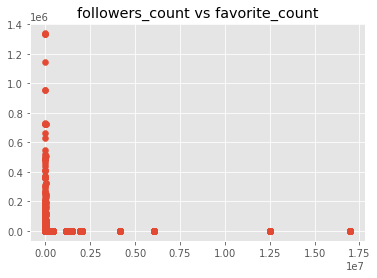

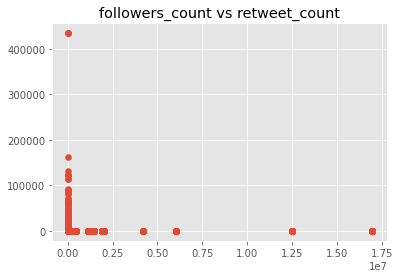

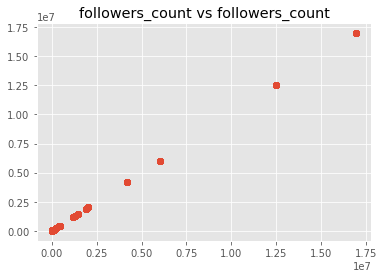

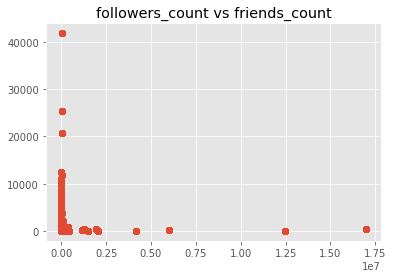

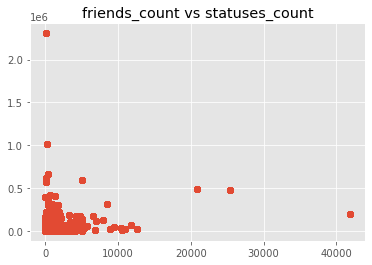

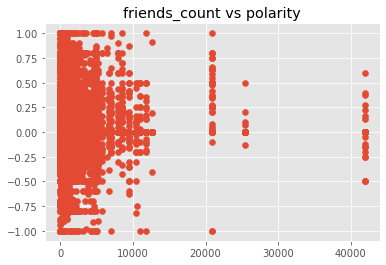

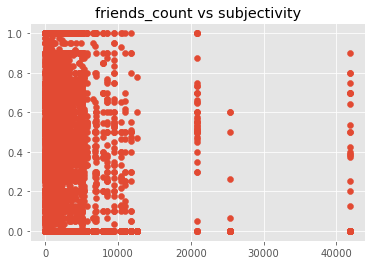

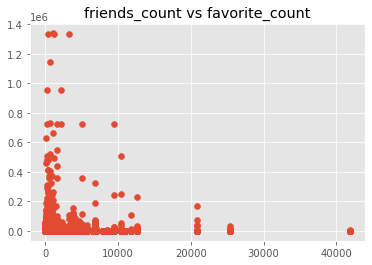

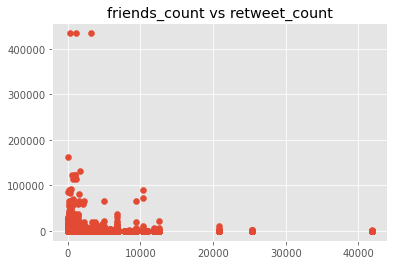

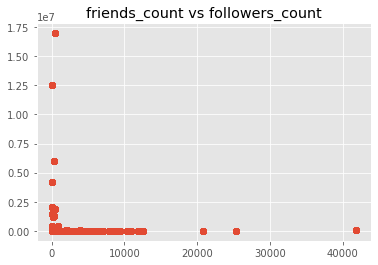

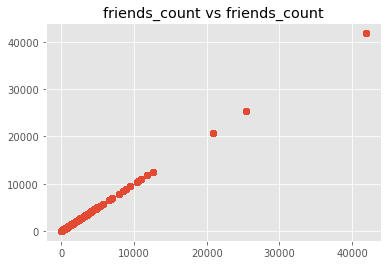

In [19]:
for k in Laety.columns:
    for i in Laety.columns:
        plt.scatter(Laety[k],Laety[i])
        plt.title(k + " "+ 'vs'+" "+ i)
        plt.show()


In [21]:
len_autor=[]
names=[]
for i in tweet_data['screen_name'].unique():
    author=tweet_data[tweet_data['screen_name']==i]
    len_autor.append(len(author))
    names.append(i)
    
    
lengthdf=pd.DataFrame(len_autor,names,columns=['each author tweet count']) 
lengthdf

,each author tweet count
McMc74078966,38
davideiacovozzi,50
MercuryReports,50
kornflex6,50
MaatWes,50
...,...
allannatividad8,50
gordontheglue,50
ibrahimpatel007,50
RosieG1029,50


In [28]:
great_tweter=lengthdf[lengthdf['each author tweet count']>= 40]
great_tweter

,each author tweet count
davideiacovozzi,50
MercuryReports,50
kornflex6,50
MaatWes,50
gfliverpool9966,50
...,...
allannatividad8,50
gordontheglue,50
ibrahimpatel007,50
RosieG1029,50
